In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Dell\Documents\Y4 Project\y4project\HBM stuff\Files\tailo2022table.csv')
#print(df)  
df_first_30 = df[:31]
print(df_first_30)



       WID            GaiaDR3ID          RA        DEC     Vdr   CUBI    Teff  \
0     W491  6045479078332149632  245.798065 -26.444676  13.757 -2.059  4788.0   
1     W508  6045478047540140544  245.800242 -26.495482  14.307 -2.096  4926.0   
2    W760*  6045477841381440384  245.820424 -26.496654  13.129 -2.038  4668.0   
3     W779  6045479490649030272  245.822060 -26.416080  14.059 -2.114  4844.0   
4     W799  6045478288058130304  245.823516 -26.452857  13.313 -1.915  5596.0   
5     W837  6045478081899629696  245.825992 -26.485369  14.842 -2.071  5030.0   
6    W1068  6045478184978847616  245.839217 -26.475993  14.307 -2.076  4900.0   
7    W1091  6045478666015246592  245.840398 -26.446373  13.488 -2.054  4787.0   
8    W1156  6045477910100876544  245.843863 -26.495077  14.053 -2.134  4858.0   
9    W1225  6045477978820371712  245.847568 -26.486060  13.440 -1.983  5326.0   
10   W1582  6045477944460600960  245.866076 -26.486544  14.293 -2.138  4885.0   
11   W1608  6045478734734712

In [2]:
import numpy as np

Teff = np.array(df_first_30["Teff"])
L = np.array(df_first_30["L"])
errL = np.array(df_first_30["errL"])
numax = np.array(df_first_30["numax"])
errnumax = np.array(df_first_30["errnumax"])
Deltanu = np.array(df_first_30["Deltanu"])
errDeltanu = np.array(df_first_30["errDeltanu"])

print(errL)


[4.083 2.192 7.748 3.03  4.332 1.235 2.229 5.227 3.026 4.203 2.271 4.936
 2.016 9.199 1.628 3.448 8.468 5.24  4.528 4.214 8.007 4.884 3.922 4.798
 2.472 2.6   3.55  2.737 5.117 4.649 3.942]


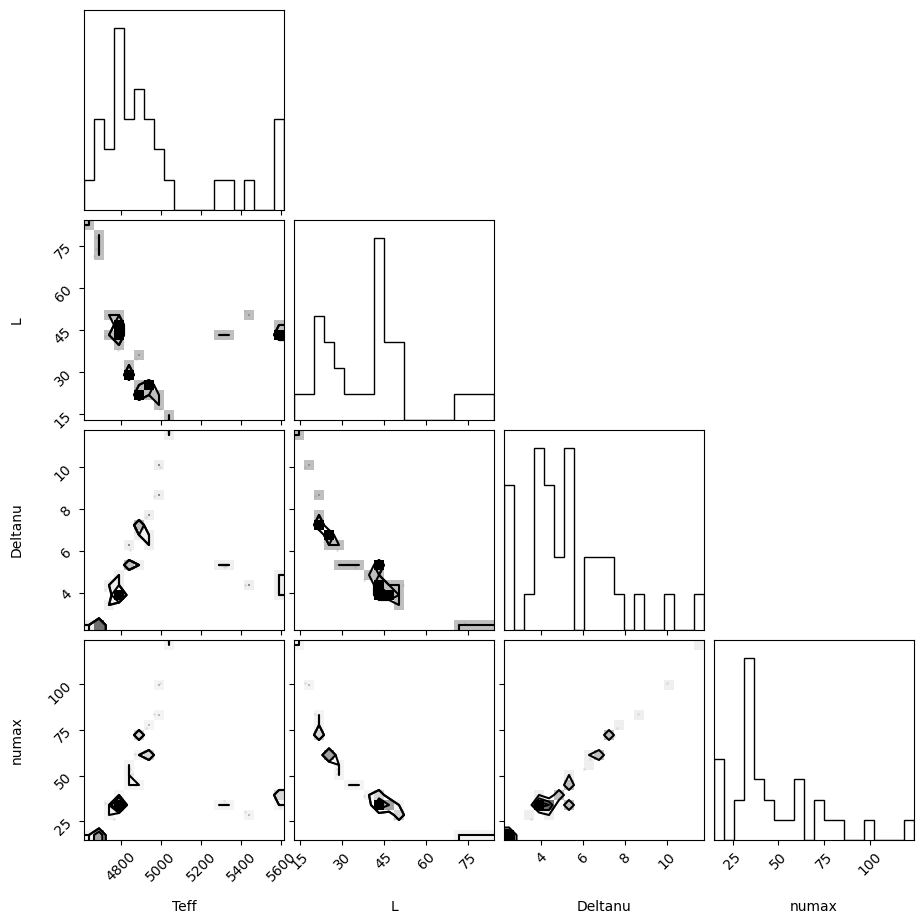

In [5]:
import corner
import matplotlib.pyplot as plt
import numpy as np

samples = np.column_stack([L, Deltanu, numax])

param_names = ["L", "Deltanu", "numax"]

fig = corner.corner(df_first_30, var_names=['Teff', 'L', 'Deltanu', 'numax'])

axes = np.array(fig.axes).reshape((4, 4))

error_dict = {
    "L": errL,
    "Deltanu": errDeltanu,
    "numax": errnumax,
}


for i, param in enumerate(param_names):
    ax = axes[i, i]  # Diagonal axes (1D histograms)

    values = samples[:, i]  # The samples for this parameter
    

    # Scatter plot each sample with its error bar
    # ax.errorbar(values, np.zeros_like(values), xerr=error_dict[param], 
    #             fmt='o', color='red', alpha=0.3)

plt.show()

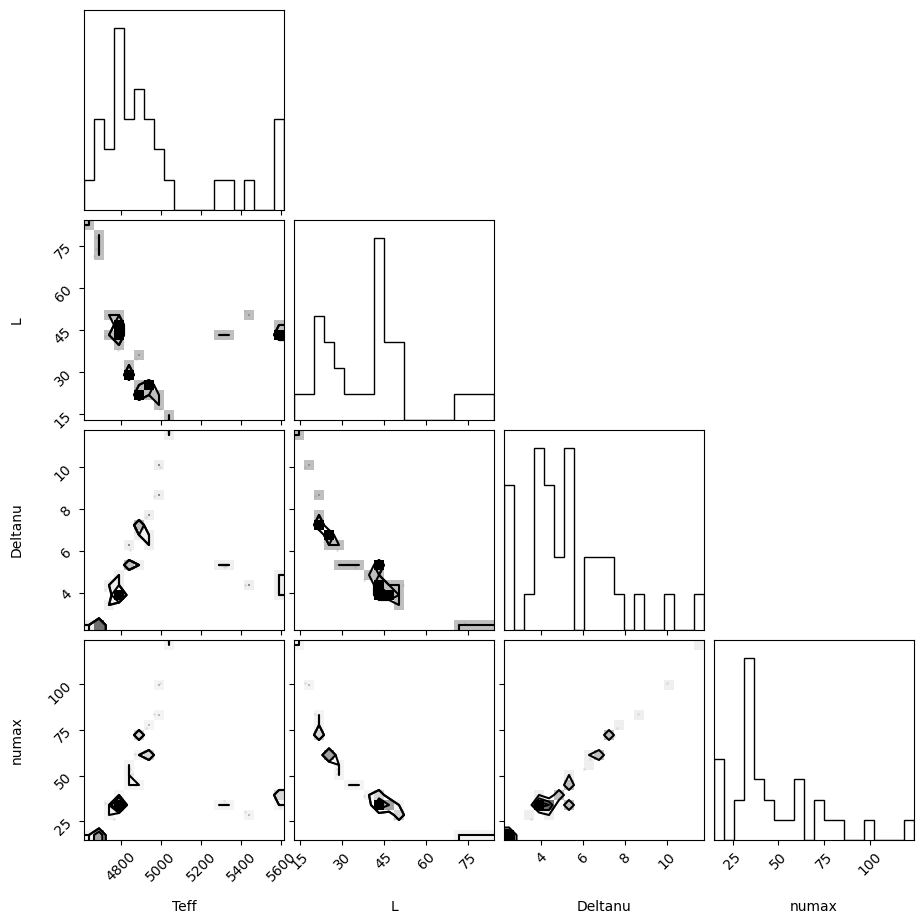

In [7]:
samples = np.column_stack([L, Deltanu, numax])

param_names = ["L", "Deltanu", "numax"]

fig = corner.corner(df_first_30, var_names=['Teff', 'L', 'Deltanu', 'numax'])

axes = np.array(fig.axes).reshape((4, 4))

error_dict = {
    "L": errL,
    "Deltanu": errDeltanu,
    "numax": errnumax,
}


for i in range(len(param_names)):
    for j in range(i):
        ax = axes[i, j]
        # Plot errorbars on the scatter plots:
        #   - x values: samples[:, j] with xerr from error_dict[param_names[j]]
        #   - y values: samples[:, i] with yerr from error_dict[param_names[i]]
        ax.errorbar(samples[:, j], samples[:, i],
                    xerr=error_dict[param_names[j]],
                    yerr=error_dict[param_names[i]],
                    fmt='o', color='red', alpha=0.3)

plt.show()